In [1]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [2]:
path = 'C:/Users/JoseAntonio/Desktop/ENOE/adri/2016/norm2016.csv'
X = pnd.read_csv(path, encoding='latin', low_memory=False)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.000001,0.00001,0.044377,0.998983,0.000112,0.000017,0.000001,0.000001,0.0,...,0.00000,0.00000,0.00000,0.000000,0.00000,0.000009,0.000002,0.000002,0.000001,0.000468
1,0.0,0.000001,0.00001,0.044376,0.998958,0.000112,0.000017,0.000001,0.000001,0.0,...,0.00011,0.00011,0.00011,0.000110,0.00011,0.000110,0.000110,0.000110,0.000001,0.000468
2,0.0,0.000001,0.00001,0.044378,0.999008,0.000112,0.000017,0.000001,0.000001,0.0,...,0.00000,0.00000,0.00000,0.000009,0.00000,0.000049,0.000007,0.000002,0.000001,0.000468
3,0.0,0.000001,0.00001,0.044379,0.999015,0.000112,0.000017,0.000001,0.000001,0.0,...,0.00011,0.00011,0.00011,0.000110,0.00011,0.000110,0.000110,0.000110,0.000001,0.000468
4,0.0,0.000001,0.00001,0.044379,0.999015,0.000112,0.000042,0.000002,0.000001,0.0,...,0.00011,0.00011,0.00011,0.000110,0.00011,0.000110,0.000110,0.000110,0.000001,0.000468


# sampleamos los datos

In [3]:
X = X.sample(frac=0.05, random_state=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
1045953,0.0,0.000010,0.000010,0.015518,0.999876,0.000197,0.000003,3.842565e-07,3.842565e-07,0.0,...,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,3.804140e-05,3.842565e-07,0.000045
358409,0.0,0.000003,0.000010,0.016742,0.999859,0.000045,0.000015,8.322826e-07,4.161413e-07,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000002,0.000002,4.161413e-07,4.161413e-07,0.000059
875012,0.0,0.000031,0.000010,0.018509,0.999829,0.000075,0.000051,4.440714e-06,3.700595e-07,0.0,...,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,0.000037,3.663589e-05,7.401190e-07,0.000160
555046,0.0,0.000038,0.000010,0.022718,0.999742,0.000183,0.000081,4.084719e-06,4.538577e-07,0.0,...,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,0.000045,4.493191e-05,9.077154e-07,0.000103
272972,0.0,0.000081,0.000009,0.056489,0.998403,0.000190,0.000008,1.882659e-05,9.413293e-07,0.0,...,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,9.319160e-05,1.882659e-06,0.000282


# realizamos el metodo KMeans

In [4]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

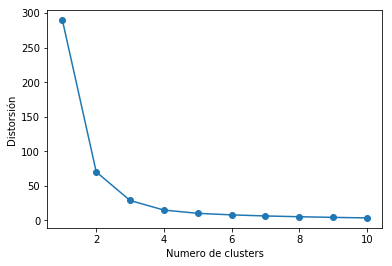

In [5]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [6]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0)

In [7]:
y_km = clusters.fit_predict(X)
y_km

array([0, 0, 0, ..., 0, 0, 0])

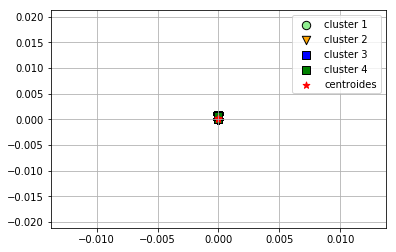

In [8]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [10]:
bandwidth = estimate_bandwidth(X, quantile=0.3)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 6


In [11]:
import matplotlib.pyplot as plt
from itertools import cycle

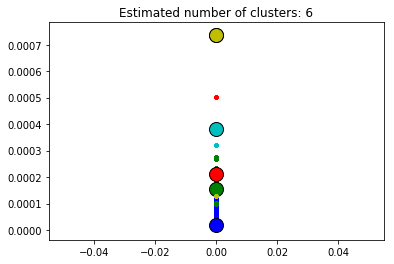

In [12]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# Aplicamos PCA al KMeans

In [13]:
from sklearn import decomposition

In [14]:
pca = decomposition.PCA(n_components=4)
pca.fit(X)
X = pca.transform(X)

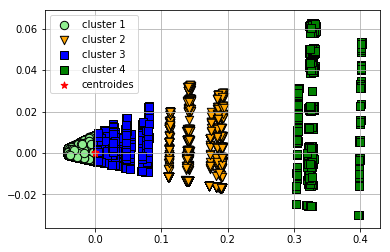

In [15]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

# Aplicamos PCA al MeanShift

In [16]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

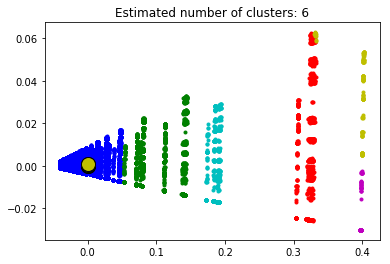

In [17]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()